In [28]:
import os
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from omnixai.data.tabular import Tabular

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [29]:
train = pd.read_csv('../data/current-dataset/train-feature-customsplit.csv', delimiter=",",index_col=0)
test = pd.read_csv('../data/current-dataset/test-feature-customsplit.csv', delimiter=",",index_col=0)
X_train = train.drop(columns='label')
y_train = train['label']
X_test = test.drop(columns='label')
y_test = test['label']

In [5]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.utils import to_categorical

feature_names = list(X_train.columns)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(train.label.copy())
class_names = label_encoder.classes_

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the test data and evaluate the model
y_pred = knn.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

        Bike       0.56      0.56      0.56       459
         Bus       0.73      0.74      0.73      4095
         Car       0.95      0.86      0.90      4401
       Metro       0.83      0.84      0.83      3769
        Moto       0.72      0.73      0.72       550
         Run       0.96      0.98      0.97       706
  Stationary       0.12      0.35      0.18       429
       Train       0.08      0.07      0.07       989
        Tram       0.82      0.71      0.76      3056
        Walk       0.83      0.85      0.84      2657
      e-Bike       0.45      0.71      0.55        48
   e-Scooter       0.69      0.70      0.70       663

    accuracy                           0.75     21822
   macro avg       0.65      0.67      0.65     21822
weighted avg       0.78      0.75      0.76     21822



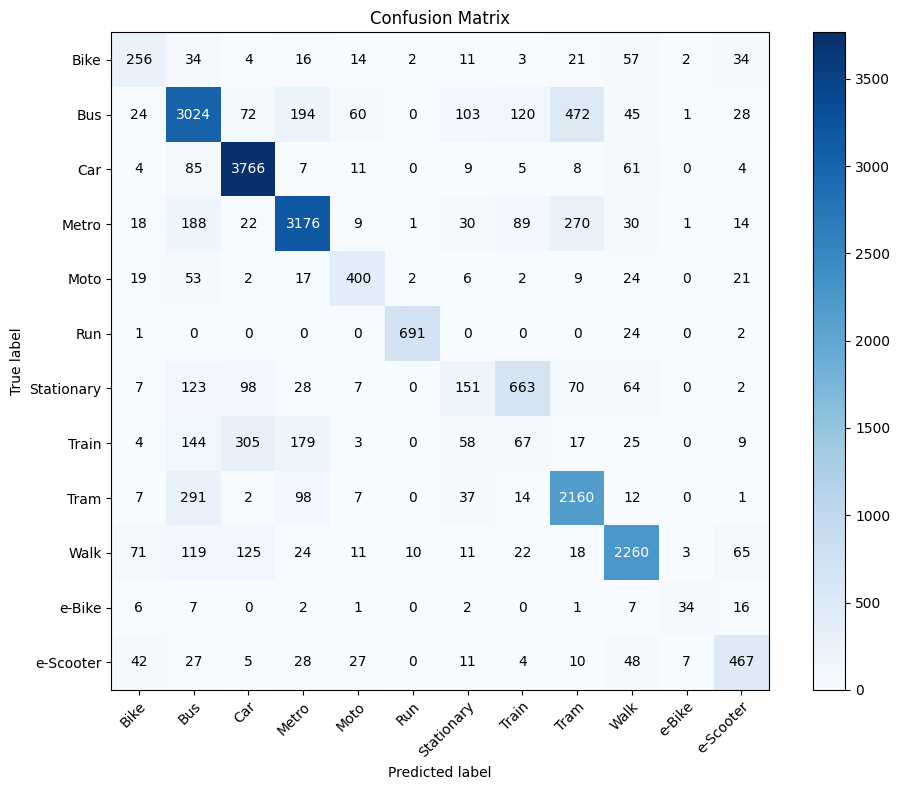

In [8]:
import sys  
sys.path.insert(0, '../../src/')
import metrics as mt
mt.plot_confusion_matrix(y_test,y_pred)

In [10]:
from sklearn.model_selection import RandomizedSearchCV
# Hyperparameter grid
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# RandomForest model
knn = KNeighborsClassifier()

# Random search with cross-validation
random_search = RandomizedSearchCV(knn, param_distributions=param_grid, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train,y_train)

# Best parameters and model
best_knn = random_search.best_estimator_

# Validate the performance
y_predi = best_knn.predict(X_test)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [11]:
random_search.best_params_

{'weights': 'uniform', 'n_neighbors': 10, 'metric': 'manhattan'}

              precision    recall  f1-score   support

        Bike       0.61      0.65      0.63       426
         Bus       0.76      0.78      0.77      4048
         Car       0.96      0.90      0.93      4238
       Metro       0.84      0.84      0.84      3833
        Moto       0.76      0.83      0.79       509
         Run       0.97      0.99      0.98       705
  Stationary       0.22      0.44      0.29       594
       Train       0.08      0.08      0.08       833
        Tram       0.87      0.73      0.79      3130
        Walk       0.86      0.85      0.86      2799
      e-Bike       0.46      0.81      0.59        43
   e-Scooter       0.76      0.77      0.76       664

    accuracy                           0.78     21822
   macro avg       0.68      0.72      0.69     21822
weighted avg       0.80      0.78      0.79     21822



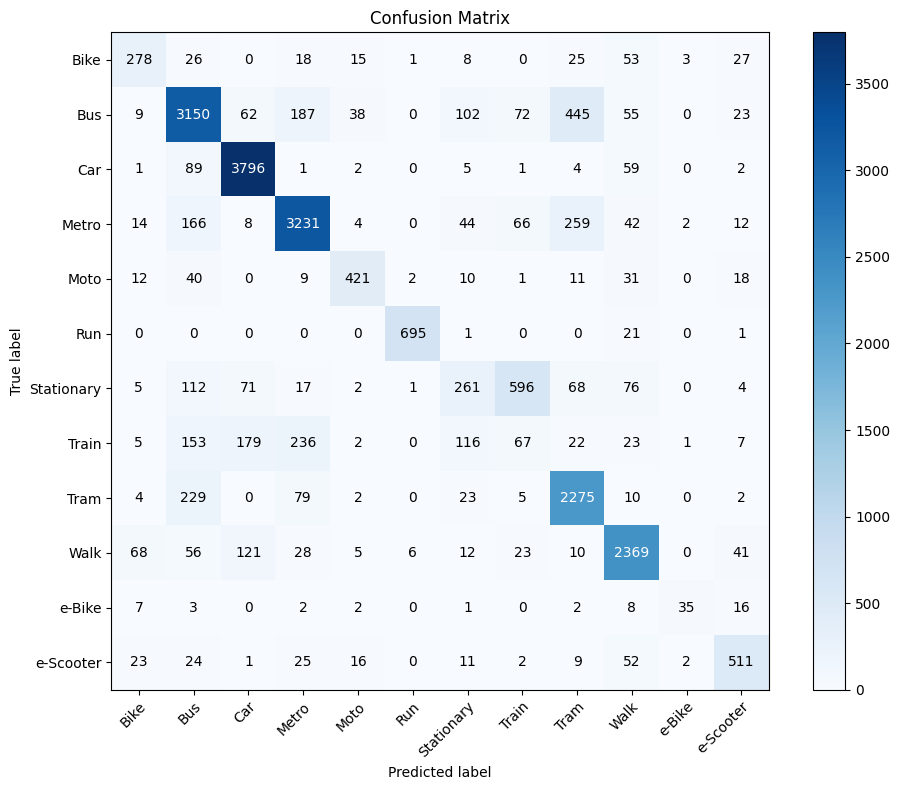

In [13]:
import sys  
sys.path.insert(0, '../../src/')
import metrics as mt
print(classification_report(y_predi, y_test))
mt.plot_confusion_matrix(y_test,y_predi)

In [27]:
train.shape

(101858, 100)